# **DESCRIPTIVE STATISTICS**

In [2]:
import os # To interact with the files system operating system's file system
import matplotlib.pyplot as plt 

import pandas as pd 
import numpy as np 
import statistics
import scipy as sp # Evolution of NumPy, numpy has added functions to work with distributions and classic statistics
import seaborn as sns
import random
import math

from statsmodels.stats.proportion import proportions_ztest # Developing models based in classic statistics


## **Descriptive vs Inferential Stats**

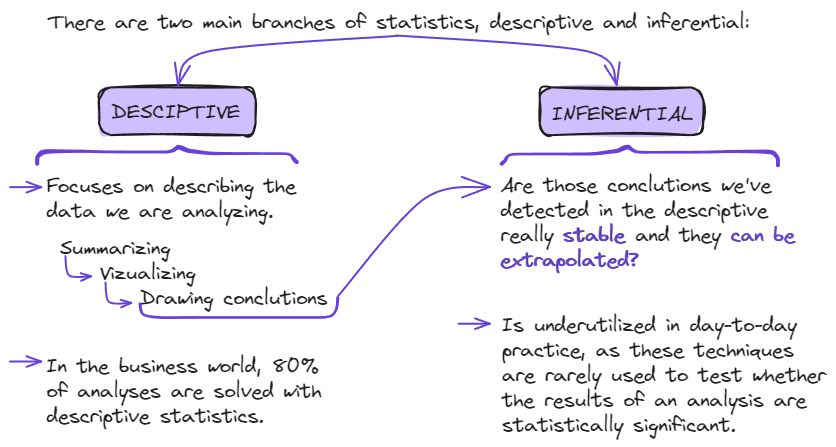

## **Terminology in Population and Sample**

<center>
  <table>
    <tr>
      <th>POPULATION</th>
      <th>SAMPLE</th>
    </tr>
    <tr>
      <td>
        <ul>
          <li>The population refers all the elements of interest</li>
          <li>The numbers that describe it are called <strong>parameters</strong></li>
          <li>Denoted by <strong>N</strong></li>
        </ul>
      </td>
      <td>
        <ul>
          <li>The sample refers to some elements.</li>
          <li>The numbers that describe it are called <strong>estimators</strong>.</li>
          <li>Denoted by <strong>n</strong>.</li>
        </ul>
      </td>
    </tr>
  </table>
</center>


## **Measurement Scales**
We can almost always make an approximate assignment to a scale. For example:
- Integers  &rarr; discrete variables.
- Real numbers &rarr; continuous.
- Objects &rarr; categorical

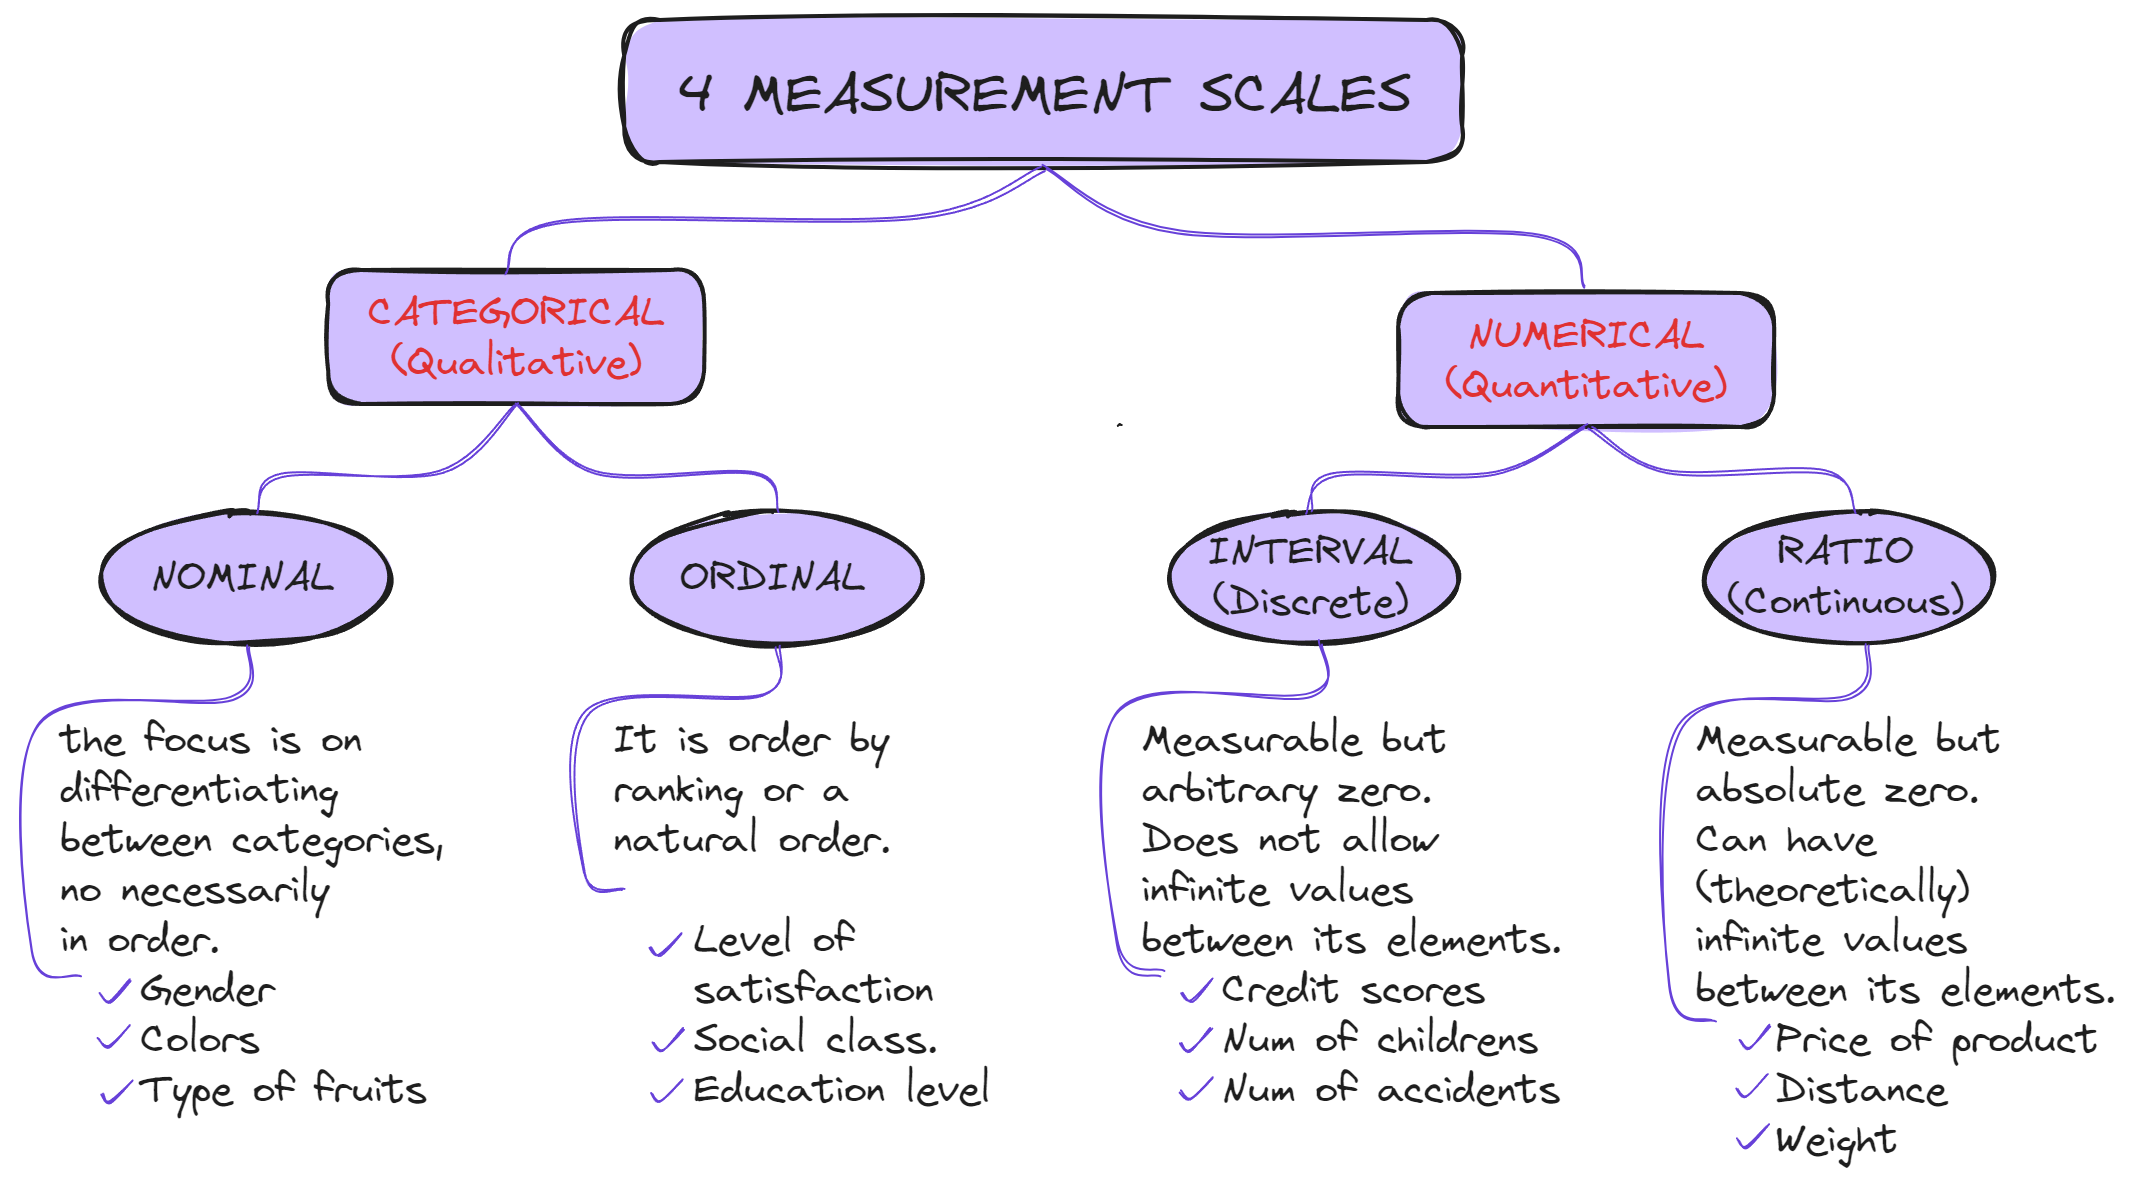

## **Categorical Variables**

### **Metricas para variables categoricas**

In [ ]:
# Así, como ya habíamos anticipado la misión de la descriptiva es resumir, graficar y analizar los datos para
#   intentar encontrar patrones de interés.

# A grandes rasgos tenemos dos tipos de técnicas a nuestra disposición:

# CÁLCULOS:
# aplicar algún tipo de estadístico o análisis y obtener uno o varios resultados numéricos
# (indicadores, tablas, porcentajes, p.e.)

# GRÁFICOS:
# resumir y mostrar la información de forma gráfica para detectar los patrones más fácilmente, en función del tipo de variable.

# CONTEOS Y FRECUENCIAS. ¿Cuantas veces aparece ese valor de esa variable categórica?
df = sns.load_dataset("tips")

print(df.info()) # Sacamos alguna información del data set
print(df.head())
print(df.smoker.value_counts())

# MODA. Estadístico más frecuente en la distribución de una variable categórica

numeros = np.random.randint(0,11,1000)
print(pd.Series(numeros).value_counts())
print(statistics.mode(numeros))

# TABLAS CRUZADAS. Para contrastar entre sí dos variables categóricas

print(pd.crosstab(df.sex,df.smoker,margins = True))
print(pd.crosstab(df.sex,df.smoker,margins = True, normalize = "all")) # Es más interesante ver estos valores en %

# CHI CUADRADO. Nos da si la relación anterior es significativa o no
# Con el resultado anterior, una pregunta que te podrías plantear sería:
# ¿Hay alguna relación ente ser hombre y ser fumador y ser mujer y ser fumadora, p.e.?

# ¿Estas diferencias son suficientes para tomar el resultado como una conclusión?
#   ¿O quizá están dentro del margen esperable por efecto del muestreo y por tanto no podemos concluir nada?

# Es lo que se llama ver si una conclusión es estadísticamente significativa y en un análisis de tablas cruzadas
#   como este podemos hacerlo con el estadístico chi-cuadrado.

# Parte de una hipótesis nula de que no hay relación entre las variables, es decir que son independientes y
#   por tanto fumar o no, no depende del sexo, y la contrasta contra los datos obtenidos.

# Si el pvalor es menor o igual que 0.05 entonces rechaza esa hipótesis nula, y significa que los datos si
#   apoyan que hay diferencias significativas y por tanto podemos concluir que sí hay diferencias en cuanto al fumar
#   entre hombres y mujeres.

tabla = pd.crosstab(df.sex,df.smoker)
chi, pvalor, gl, experado = sp.stats.chi2_contingency(tabla)

print(chi)
print(pvalor)

# En este caso el valor es mayor que 0.05, por tanto no podemos rechazar la hipótesis nula, y por tanto no hay
#   diferencias significativas entre hombres y mujeres, son puramente aleatorias

### **Graficos para variables categoricas**

In [ ]:
# Ahora vamos a hacer el análisis de variables categóricas con gráficos
# Los gráficos más frecuentes que podremos hacer con variables categóricas son:

# GRÁFICOS DE BARRAS: en vertical, horizonal o apilados, por ejemplo.
# GRÁFICOS DE SECTORES (o de tarta)

# Ruta de la carpeta de Descargas en macOS
# carpeta_destino = f"/Users/{os.getlogin()}/Downloads"
carpeta_destino = os.path.expanduser("~/Downloads")

# Creamos la carpeta de destino si no existe
if not os.path.exists(carpeta_destino):
	os.makedirs(carpeta_destino)

df.smoker.value_counts().plot(kind = 'bar');

# Guardar el gráfico en la carpeta de destino
nombre_archivo = f"grafico_ejemplo_barras.png"
ruta_grafico = os.path.join(carpeta_destino, nombre_archivo)
plt.savefig(ruta_grafico)
plt.close()  # Cerrar la figura para liberar memoria
print("Gráfico guardado en la carpeta de Descargas:", carpeta_destino)

df.smoker.value_counts().plot(kind = 'pie');

# Guardar el gráfico en la carpeta de destino
nombre_archivo = f"grafico_ejemplo_sectores.png"
ruta_grafico = os.path.join(carpeta_destino, nombre_archivo)
plt.savefig(ruta_grafico)
plt.close()  # Cerrar la figura para liberar memoria
print("Gráfico guardado en la carpeta de Descargas:", carpeta_destino)

## **Numerical Variables**

### **Calculos para variables numericas_centralizacion y dispersion**

In [ ]:
# Se diferencian dos tipos de medida:

# CENTRALIZACIÓN:
#   que intentan resumir la información de la variable en un sólo dato que pueda ser lo más representativo posible.
#   Aquí están medidas como las medias, mediana o moda.

# DISPERSIÓN:
#   que representan el grado de variabilidad existente en la variable.
#   Normalmente cuanto más baja sea la medida de dispersión más representativa será la medida de centralización.
#   Aquí entran métricas como la varianza, la desviación típica o el coeficiente de variación.

# También existen métricas para cuantificar la relación existente entre dos variables cuantitativas: las correlaciones.

### **Graficos para variables continuas**

In [ ]:
df.info()

df.total_bill.plot(kind = 'hist');

# Guardar el gráfico en la carpeta de destino
nombre_archivo = f"grafico_ejemplo_histograma.png"
ruta_grafico = os.path.join(carpeta_destino, nombre_archivo)
plt.savefig(ruta_grafico)
plt.close()  # Cerrar la figura para liberar memoria
print("Gráfico guardado en la carpeta de Descargas:", carpeta_destino)

df.total_bill.plot(kind = 'density');

# Guardar el gráfico en la carpeta de destino
nombre_archivo = f"grafico_ejemplo_densidad.png"
ruta_grafico = os.path.join(carpeta_destino, nombre_archivo)
plt.savefig(ruta_grafico)
plt.close()  # Cerrar la figura para liberar memoria
print("Gráfico guardado en la carpeta de Descargas:", carpeta_destino)

df.plot.scatter('total_bill','tip');

# Guardar el gráfico en la carpeta de destino
nombre_archivo = f"grafico_ejemplo_dispersion.png"
ruta_grafico = os.path.join(carpeta_destino, nombre_archivo)
plt.savefig(ruta_grafico)
plt.close()  # Cerrar la figura para liberar memoria
print("Gráfico guardado en la carpeta de Descargas:", carpeta_destino)

## **Los diferentes tipos de medias**

In [ ]:
# La media normal se llama media aritmétrica, y será la que usaremos en la mayoría de los casos.
# La media winsorizada se usa cuando hay valores atípicos que pueden sesgar el valor de la media.

# Para hacer la media de porcentajes o tasas hay que usar la media geométrica.
# Para hacer la media de medias hay que usar la media armónica.

print(statistics.mean([3,4,5])) # La media aritmética

# Para calcular la media winsorizada
# Ejemplo distribución salarios. Si hay un valor que dispara la media pero no es representaivo
# cogeríamos el valor anterior y lo substituiríamos por ese

numeros = np.array([3,4,5,6,999997])
print(numeros)
print(numeros.mean())

# Winsorizar sustituye los valores fuera de los límites por el último valor
winsorizados = sp.stats.mstats.winsorize(numeros, limits = [0, 0.2]) # Límite del 20% por encima
print(winsorizados)
print(winsorizados.mean())

# Media geométrica (para porcentajes o tasas)
print(statistics.geometric_mean([0.3,0.4,0.5]))

# Comparamos con lo que hubiera salido en una media arimética
print(statistics.mean([0.3,0.4,0.5])) # No sería un error muy grande, pero lo correcto para trabajar
#                                           con porcentajes es la media geométrica

# Media armónica (para media de medias), p.e. lotes de productos (dónde ya hay una media)
# Suponemos que los datos de esta lista son medias, p.e. velocidad media de coches en 3 calles
print(statistics.harmonic_mean([30.3,40.8,50.1]))

# Comparamos con lo que hubiera salido en una media arimética
print(statistics.mean([30.3,40.8,50.1]))

## **Cuando la mediana es mejor estimador**

In [ ]:
# Si se ordenan todos los valores de la variable en orden ascendente o descendente la mediantaes el valor de la
#   variable correpondiente al elemento que ocupa la posición central, es decir, el que está en el 50%.

# La mediana es una medida de centralización más recomendable que la media cuando tenemos distribuciones que no
#   son normales, o cuando tenemos atípicos, por ejemplo, lo salarios tienen este tipo de distribuciones

numeros = np.random.randint(0,11,11)
numeros_ord = np.sort(numeros) # Es importante que esten ordenados

print(numeros_ord)
print(statistics.median(numeros_ord))

## **Entendiendo la varianza**

In [ ]:
# La varianza es el resultado de restar la media a cada valor de la variable,
#   elevarlo al cuadrado (para evitar los negativos), sumarlo todo, y dividir el resultado por el número de datos.
# Es una medida de dispersión, porque será mayor cuanto más lejos estén el global de los valores con respecto a la media.

var1 = np.random.randint(0,11,20)
print(var1)
media = var1.mean()
print(media)
suma_cuadrados = sum((var1 - media) ** 2) # Sumatorio de (xi - xm)^2 / n
print(suma_cuadrados)
varianza = suma_cuadrados / (len(var1))
print(varianza)

print(var1.var())

## **Desviacion tipica y coeficiente de variacion**

In [ ]:
print("*****************")
print("DESVIACIÓN TÍPICA")
print("*****************")

# El cálcul de la varianza implica elevar al cuadrado para quitarnos los negativos.
# Entonces, el dato obtenido ya no está en la misma escala que la media para poder compararlos, p.e.
# Como solución se hace la raiz cuadrada a la varianza para volver a traerla a la escala, y es lo que se llama desviación típica.

# Un ejemplo es cómo se calcula el coeficiente intelectual de las personas, y se puede comparar hablando en términos de 2 desviaciones típicas por encima de la media

print(var1.std())

print("************************")
print("COEFICIENTE DE VARIACIÓN")
print("************************")
# Decíamos que cuanto más baja sea la dispersión con respecto a la media será mejor porque nos
#   indica que esa media es más representativa del total de los datos de la variable.

# Ahora que ya tenemos una medida, la desviación típica, que sí está en la misma escala que la media, podemos compararlas.
# Esto es lo que se conoce como coeficiente de variación, y consiste en dividir la desviación típica por la media, en %

# Por ejemplo, permite comparar entre variables de diferentes escalas: ¿en qué somos más variables las personas:
#   ¿en la altura o en el peso?

print(var1.std() / var1.mean() * 100)

## **Conociendo las limitaciones de la correlacion de Pearson**

In [ ]:
# Cuando hablamos de correlación para medir la relación entre dos variables no estamos refiriendo a Pearson.

# Sólo sería técnicamente correcto usar Pearson con variables contínuas y linealmente relacionadas,
#   y si estas tienen una distribución normal.

# Si las variables no son contínuas o normalmente distribuídas, o su relación es no lineal usar Pearson
#   no es lo más correcto. Podríamos usar Spearman como veremos luego.

# La correlación de Pearson es una medida lineal, y por tanto no válida para medir relaciones no lineales.

# Entonces, significa que si dos variables aparecen como correlacionadas según Pearson efectivamente tendrán relación.
#   Pero lo contrario no es siempre cierto, ya que podría haber relación pero ser no lineal.

# La forma más fácil para identificar correlaciones no lineales es usar un gráfico de dispersión.

# La correlación de Pearson se interpreta así:

# +1 o -1: es una correlación perfecta (siempre que sube una la otra también o siempre que sube una la otra baja)
# 0: no hay relación entre las variables

# Si el pvalor está por debajo de 0.05 la relación sí es significativa (se recomienda considerarlo sólo para más de 500 datos)

var1 = np.random.randint(1,21,1000) # valor
var2 = np.random.randint(1,21,1000) # pvalor

print(sp.stats.pearsonr(var1,var2))

## **Que nos aporta el R cuadrado**

In [ ]:
# O coeficiente de determinción

# R cuadrado es simplemente el cuadrado de la correlación de Pearson.

# Pero sin embargo es una métrica muy útil en modelización, ya que se puede entender como el porcentaje
#   de una variable que podemos explicar a partir de otra (o combinación de otras como en los modelos lineales).

# Por tanto será frecuente verla en modelos como las regresiones, donde el software nos reportará,
#   por ejemplo un R cuadrado de 0.6 y eso significa que con nuestro modelo estamos siendo capaces
#   de explicar el 60% de la variable objetivo, y por tanto nos queda un 40% que no sabemos explicar.

# Al igual que la correlación de Pearson es una medida lineal, por tanto si cuando estamos modelizando
#   con una técnica lineal nos sale un R cuadrado bajo puede ser interesante probar una técnica no lineal
#   para ver si hay relaciones no lineales que no estaban siendo capturadas.

# Pero seguimos hablando de relación LINEAL, es posible que exista relación, pero NO LINEAL, p.e.
print((sp.stats.pearsonr(var1,var2)[0] ** 2) * 100)

## **Cuando y como usar Spearman**

In [ ]:
# La Rho de Spearman proporciona una solución para hacer la correlación cuando:

# - Las variables son contínuas pero no se distribuyen según la normal
# - Las variables son rankings (o discretas, p.e. # hijos)
# - La relación es no lineal
# - Las variables son discretas pero con menos de 30 valores distintos

# Se interpreta así:

# +1 o -1: es una relación perfectamente monotónica (siempre que sube una la otra también o al revés)
# 0: no hay relación entre las variables

#Si el pvalor está por debajo de 0.05 la relación sí es significativa (se recomienda considerarlo sólo para más de 500 datos)

var1 = np.random.randint(1,21,1000)
var2 = np.random.randint(1,21,1000)

print(sp.stats.spearmanr(var1,var2))

## **Correlacion no es causalidad**

In [ ]:
# CORRELACIÓN VS CAUSALIDAD

# Este es uno de los errores más frecuentes en el uso cotidiano de la estadística.

# Se tiende a pensar que si dos variables están correlacionadas entonces se puede establecer
#   una relación causa - efecto entre ellas. Realmente, para poder establacer una relación causa - efecto se tiene que cumplir que:

# - Exista correlación
# - La causa preceda en el tiempo a la consecuencia
# - Se puedan descartar explicaciones alternativas

# Aquí entran los conceptos de correlación espúrea y correlación parcial.

# - Correlación espúrea es cuando dos variables parece que están relacionadas (pueden correlacionar de hecho),
#       pero es realmente por el efecto de otras terceras variables no consideradas.


# - Correlación parcial es la correlación real que queda entre las 2 primeras variables una vez
#       que se elimina el efecto de la tercera o terceras.

# Por ejemplo, está demostrado que existe alta correlación entre el tamaño del pie y el cociente de inteligencia.

# Sin embargo esa correlación está marcada realmente por una tercera variable, la edad.
#   Si se controla la edad y se elimina su efecto entonces ya no existe correlación entre el tamaño del pie
#   y el cociente de inteligencia.

# En contextos empresariales está plagado de este tipo de efectos y es conveniente conocer este concepto
#   y aplicar siempre la visión crítica antes de obtener conclusiones.

# - No suben las ventas cuando hay promociones: ¿se han controlado las promociones de la competencia?
# - Los empleados que viajan dejan más la empresa: ¿se ha controlado la edad?
# - Los clientes que más ganan sin embargo tienen menos ahorros: ¿se ha diferenciado entre los que tienen hipoteca y los que no?

## **Resumen y para que se usa todo esto**

In [ ]:
# Cuando hagas análisis invertiás tiempo haciendo análisis y gráficos para las fases de un proyecto de Data Science de:

# - Calidad de datos
# - Corrección de errores
# - Análisis exploratorio
# - Transformación y creación de variables

# Además la correlación es una de las técnicas de preselección de variables en modelización predictiva,
#   así que la usaremos potencialmente de dos formas:

# - Identificar qué variables NO están correlacionadas con la variable a predecir, y por tanto
#       no invertir tiempo en trabajar sobre ellas ni incluirlas en la modelización

# - Identficiar qué variables están correlacionadas entre sí y por tanto no es conveniente
#       usarlas simultáneamente en los modelos